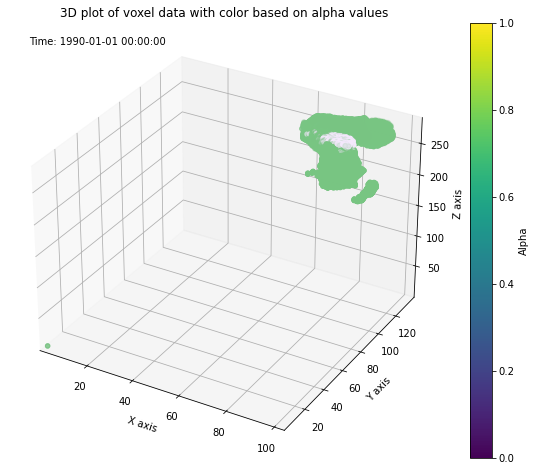

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import HTML

# Load the data from CSV files
df_voxel = pd.read_csv('voxel_removed.csv', header=None, names=['index', 'x', 'y', 'z'])
df_color = pd.read_csv('data_color.csv', header=None, names=['index', 'red', 'green', 'blue', 'alpha'])
df_time = pd.read_csv('voxel_time_stamp.csv', header=None, names=['timestamp'])

# Merge the dataframes based on the 'index' column
df_merged = pd.merge(df_voxel, df_color, on='index')

# Convert the timestamp to datetime format
df_time['datetime'] = pd.to_datetime(df_time['timestamp'], unit='s', origin='1990-01-01')

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the colormap based on the alpha values
colors = df_merged[['red', 'green', 'blue', 'alpha']].values / 255.0

# Plot the points with a color based on the alpha value
sc = ax.scatter(df_merged['x'], df_merged['y'], df_merged['z'], c=colors)

# Set the limits for the x, y, and z axes
ax.set_xlim3d(df_merged['x'].min(), df_merged['x'].max())
ax.set_ylim3d(df_merged['y'].min(), df_merged['y'].max())
ax.set_zlim3d(df_merged['z'].min(), df_merged['z'].max())

# Add a colorbar for the alpha values
cbar = plt.colorbar(sc)
cbar.set_label('Alpha')

# Add a title and labels for the axes
ax.set_title('3D plot of voxel data with color based on alpha values')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Make the plot dynamic based on the timestamp
def update_plot(num):
    # Update the view angle
    ax.view_init(elev=30, azim=num)
    
    # Update the annotation with the current timestamp
    timestamp = df_time['datetime'][num].strftime('%Y-%m-%d %H:%M:%S')
    annotation.set_text(f'Time: {timestamp}')
    
    # Update the colors of the points based on the alpha value at the current timestamp
    alpha_values = df_color.loc[df_color.index <= num, 'alpha'].values
    alpha_values = alpha_values / 255.0
    sc.set_facecolor(alpha_values)

# Add a text annotation to the plot
timestamp = df_time['datetime'][0].strftime('%Y-%m-%d %H:%M:%S')
annotation = ax.text2D(0.05, 0.95, f'Time: {timestamp}', transform=ax.transAxes)

ani = animation.FuncAnimation(fig, update_plot, frames=len(df_time), interval=50)

plt.show()

ModuleNotFoundError: No module named 'plotly'